# Sidewalk to Street "Walkability" Ratio

For the analysis of the best Pittsburgh neighborhood by most accessible transportation, one of the datasets we chose to analyze was the sidewalk to street "walkability" ratio. This was chosen in the case that someone would want to travel on foot in a given location as their means of transportation. A ratio of 1 means that there is equal length of sidewalk to street ratio, and a ratio of 2 means that there is double the length of sidewalk compared to street. 

In [5]:
import pandas as pd
import geopandas

In [6]:
pgh_neiborhood=pd.read_csv("neighborhoods.csv")
pgh_neiborhood.head(10)
pgh_neiborhood[['hood', 'hood_no', 'geoid10']].head(10)

,hood,hood_no,geoid10
0,Chateau,22,420039806001
1,Summer Hill,81,420032612001
2,Northview Heights,58,420032609001
3,Spring Hill-City View,75,420032620001
4,Perry South,62,420032615001
5,Fineview,33,420032509002
6,Central Northside,19,420032503001
7,Spring Garden,74,420032412002
8,Troy Hill,84,420032406002
9,East Allegheny,26,420035632003


I first opened the file containing all neighboorhoods in Pittsburgh and removed all irrelevant columns to the final goal. This left the neighborhood name, number, and a designated geoid number. 

In [7]:
pgh_walkratio=pd.read_csv("SidewalkStreetRatio.csv")
pgh_walkratio[['GEOID', 'Ratio']].head(10)

,GEOID,Ratio
0,420030103001,0.441776
1,420030103002,1.551697
2,420030103003,1.538866
3,420030103004,1.249711
4,420030201001,1.799394
5,420030201002,1.743155
6,420030201003,2.303707
7,420030201004,1.640231
8,420030201005,1.354883
9,420030201006,1.429927


After that, I looked into the data from studies containing the ratios of sidewalks to streets in neighborhoods. This data does not contain the names of each neighboorhood; instead, it contains the geoid of each neighboorhood and its corresponding ratio of sidewalks to streets. A higher ratio meant that there were more sidewalks in comparison to the number of streets. 

In [8]:
pgh_neiborhood=pd.read_csv("neighborhoods.csv")
#pgh_neiborhood.head(10)
#pgh_neiborhood[['hood', 'hood_no', 'geoid10']].head(10)
#print (pgh_neiborhood['geoid10'].dtype)

pgh_walkratio=pd.read_csv("SidewalkStreetRatio.csv")
#pgh_walkratio[['GEOID', 'Ratio']].head(10)
#print (pgh_walkratio['GEOID'].dtype) # prints int64 --> cannot map with object type
pgh_walkratio['GEOID'] = pgh_walkratio['GEOID'].astype(str) #GEOID is int type --> convert to string to map with object type

#pgh_neiborhood['Ratio'] = pgh_neiborhood['geoid10'].map(pgh_walkratio.set_index('GEOID')['Ratio'])
ratiodict = pgh_walkratio.set_index('GEOID')['Ratio'].to_dict()
#print(ratiodict)
pgh_neiborhood['Ratio'] = pgh_neiborhood.geoid10.map(ratiodict)
ratioByHood=pgh_neiborhood[['hood','Ratio']].sort_values(by='Ratio', ascending=False)
print(ratioByHood.head(20))

                        hood     Ratio
57         Bedford Dwellings  6.644908
44       Squirrel Hill North  3.615286
13          Allegheny Center  3.227465
22  Lincoln-Lemington-Belmar  3.092941
45           Terrace Village  3.017543
2          Northview Heights  2.712593
33            Homewood North  2.512087
26                  Garfield  2.322960
32        Point Breeze North  2.319320
24                Bloomfield  2.265926
85                 Overbrook  2.232174
35              East Liberty  2.116163
60               Beltzhoover  2.021953
27               Morningside  2.016948
81                  Sheraden  1.952216
29                Friendship  1.816415
38              West Oakland  1.773651
53              Point Breeze  1.766703
7              Spring Garden  1.738268
71         Arlington Heights  1.683838


Because we only had the geoid from the previous dataset and we were looking for the actual neighborhood names to compare, I matched the geoid from the first dataset to the ones from the second data set to link the neighborhood names from the first dataset to the ratios from the second. 

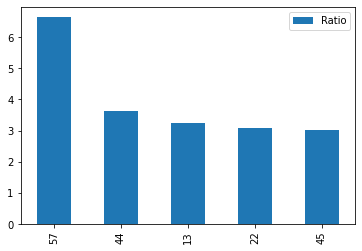

In [10]:
ratioByHood[['hood', 'Ratio']].head().plot.bar()